<H1><center> COMP 47750 - Machine Learning with Python

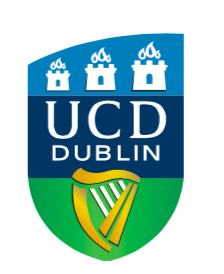

<H3><center> UCD School of Computer Science   
<H4><center>University College Dublin

<center><H2>Assignment 2</H2>      
<H3><em>Pipelines & Feature Selection    

#### **Student Name:**    
John O'Meara    

#### **Student Number:**    
19200612

 ---

### 1. Rectifying Bias - cross validation 
In the first assignment the impact of the strategies to reduce bias was assessed using
hold-out testing. The results from this assessment were unstable because of the size of the
training data - different train-test splits produce different results. Repeat this assessment
using pipelines and cross validation.  


**Requirements**

1. From your first assignment submission, show the hold-out evaluation of the impact of
your bias reduction strategy (just one strategy). This will serve as a base-line.     

2. Use a Pipeline to repeat this evaluation using cross validation.

3. Comment on the differences between the two evaluations. You may choose to run
both evaluations multiple times to show the differences.     

**Note :**
Because imblearn SMOTE is a slightly odd transformer (changes the size of the training
set) it cannot be used with the sklearn pipeline. You need to use the imblearn Pipeline -
it works in exactly the same way. 

### 2. Feature Selection   
The objective of this exercise is to assess the impact of feature selection on training and test
datasets.   
Two datasets accompany this assignment, **heart-train.csv** and **heart-test.csv.**      
The idea is to identify a good feature subset using the training dataset and test this subset
on the test data. In preparing your submission, you should focus on explaining discrepancies
between train and test performance rather than maximising performance.   

**Requirements**

4. Use Gradient Boosting as your classifier < <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html">link</a> >.
5. As a baseline, you should report performance (accuracy) on the train and test data
using all features. The results on the training data can be based on cross validation.
The results on the test data can be hold-out, i.e. train on train data and test on test
data.
6. Using a feature subset selection method of your choice identify a feature subset that
you expect to generalise well for this task. Test the performance of this feature
subset on the test data.
7. At no stage should the test data be used in classifier training or in feature selection.
8. In discussing your results, you should comment on the stability and consistency of
the results.
9. Your discussion should comment on the insights into the data that can be derived
from the overall analysis.

**Submission:** This is an individual (not group) project. Submission is through the
Brightspace page. Your submission should comprise your notebook. Clear all outputs in the
notebook before saving for submission. You should use markdown cells in the notebook to
report your findings and conclusions.

# Table of Contents
Click on a link to go to that part of the notebook  
- [Table of Contents](#Table-of-Contents)
- [Question 1 - Rectifying Bias - Cross Validation](#Question-1---Rectifying-Bias---Cross-Validation)
    - [Dataset used in Question 1](#Dataset-used-in-Question-1)
    - [Part 1 - Hold-out Evaluation](#Part-1---Hold-out-Evaluation)
        - [1.1.1 Data Preparation](#1.1.1-Data-Preparation)
        - [1.1.2 Prepare Models](#1.1.2-Prepare-Models)
        - [1.1.3 Analysis of bias in the uncorrected data](#1.1.3-Analysis-of-bias-in-the-uncorrected-data)
            - [i) Train/Test Split](#i\)-Train/Test-Split)
            - [ii) Training and Bias Analysis](#ii\)-Training-and-Bias-Analysis)
            - [iii) Plot of Bias Analysis](#iii\)-Plot-of-Bias-Analysis)
            - [iv) Discussion](#iv\)-Discussion)
            - [v) ROC Curves](#v\)-ROC-Curves)
        - [1.1.4 Impact of SMOTE using hold-out evalutaion](#1.1.4-Impact-of-SMOTE-using-hold-out-evalutaion)
            - [a) Train/Test Split](#a\)-Train/Test-Split)
            - [b) SMOTE](#b\)-SMOTE)
            - [c) Training and Bias Analysis](#c\)-Training-and-Bias-Analysis)
            - [d) Plot of Bias Analysis](#d\)-Plot-of-Bias-Analysis)
            - [e) Discussion](#e\)-Discussion)
            - [f) ROC Curves](#f\)-ROC-Curves)
        - [1.1.5 Examine Impact of SMOTE with hold-out over 10 iterations with different random_state seeds](#1.1.5-Examine-Impact-of-SMOTE-with-hold-out-over-10-iterations-with-different-random_state-seeds)
            - [1.1.5.1 Random States](#1.1.5.1-Random-States)
            - [1.1.5.2 Ten Random State runs for each model](#1.1.5.2-Ten-Random-State-runs-for-each-model)
            - [1.1.5.3 kNN Classifier Results](#1.1.5.3-kNN-Classifier-Results)
            - [1.1.5.4 Decision Tree Classifier Results](#1.1.5.4-Decision-Tree-Classifier-Results)
            - [1.1.5.5 Logistic Regression Classifier Results](#1.1.5.5-Logistic-Regression-Classifier-Results)
            - [1.1.5.6 Gradient Boosting Classifier Results](#1.1.5.6-Gradient-Boosting-Classifier-Results)
            - [1.1.5.7 Comparison of Average for 4 Models](#1.1.5.7-Comparison-of-Average-for-4-Models)
    - [Part 2 - Cross Validation](#Part-2---Cross-Validation)
        - [1.2.1 Examine Impact of SMOTE with Cross Validation over 10 iterations with different random_state seeds](#1.2.1-Examine-Impact-of-SMOTE-with-Cross-Validation-over-10-iterations-with-different-random_state-seeds)
            - [1.2.1.1 Create a new list of models](#1.2.1.1-Create-a-new-list-of-models)
            - [1.2.1.2 Define Scoring Metrics](#1.2.1.2-Define-Scoring-Metrics)
            - [1.2.1.3 Ten Random State runs for each model](#1.2.1.3-Ten-Random-State-runs-for-each-model)
            - [1.2.1.4 kNN Classifier Results](#1.2.1.4-kNN-Classifier-Results)
            - [1.2.1.5 Decision Tree Classifier Results](#1.2.1.5-Decision-Tree-Classifier-Results)
            - [1.2.1.6 Logistic Regression Classifier Results](#1.2.1.6-Logistic-Regression-Classifier-Results)
            - [1.2.1.7 Gradient Boosting Classifier Results](#1.2.1.7-Gradient-Boosting-Classifier-Results)
            
            - [1.2.1.8 Comparison of Average for 4 Models](#1.2.1.8-Comparison-of-Average-for-4-Models)     
    - [Part 3 - Comparison](#Part-3---Comparison)
  
  
- [Question 2 - Feature Selection](#Question-2---Feature-Selection)
    - [Dataset used in Question 2](#Dataset-used-in-Question-2)
    - [Part 1 - All Features](#Part-1---All-Features)
        - [2.1.1 Data Preparation](#2.1.1-Data-Preparation)
        - [2.1.2 Prepare Model](#2.1.2-Prepare-Model)
        - [2.1.3 Accuracy of Gradient Boosting on Training Data](#2.1.3-Accuracy-of-Gradient-Boosting-on-Training-Data)
        - [2.1.4 Accuracy of Gradient Boosting on Test Data](#2.1.4-Accuracy-of-Gradient-Boosting-on-Test-Data)
    - [Part 2 - Feature Subset Analysis](#Part-2---Feature-Subset-Analysis)
        - [2.2.1 - Forward Sequential Selection (a.k.a Sequential Forward Search SFS)](#2.2.1---Forward-Sequential-Selection-(a.k.a-Sequential-Forward-Search-SFS))
            - [Full Feature Set SFS](#Full-Feature-Set-SFS)
                - [SFS Plots](#SFS-Plots)
                - [SFS Order of Features Chosen](#SFS-Order-of-Features-Chosen)
            - [Feature Subset SFS with 5 features](#Feature-Subset-SFS-with-5-features)
                - [Feature Subset SFS Plots](#Feature-Subset-SFS-Plots)
                - [Feature Subset SFS Order of Features Chosen](#Feature-Subset-SFS-Order-of-Features-Chosen)
                - [Training and Testing model with Feature Subset](#Training-and-Testing-model-with-Feature-Subset)
                - [Accuracy Plots](#Accuracy-Plots)
        - [2.2.2 - Backward Sequential Elimination (a.k.a. Sequential Backward Selection SBS)](#2.2.2---Backward-Sequential-Elimination-(a.k.a.-Sequential-Backward-Selection-SBS))
            - [Full Feature Set SBS](#Full-Feature-Set-SBS)
                - [Full Feature Set SBS Plots](#Full-Feature-Set-SBS-Plots)
                - [Full Feature Set SBS Order of Features Eliminated](#Full-Feature-Set-SBS-Order-of-Features-Eliminated)
            - [Feature Subset SBS with 11 features](#Feature-Subset-SBS-with-11-features)
                - [11 Feature Subset SBS Plots](#11-Feature-Subset-SBS-Plots)
                - [11 Feature Subset SBS Order of Features Eliminated](#11-Feature-Subset-SBS-Order-of-Features-Eliminated)
                - [11 Feature Subset SBS Features Retained](#11-Feature-Subset-SBS-Features-Retained)
                - [Training and Testing model with 11 Feature Subset](#Training-and-Testing-model-with-11-Feature-Subset)
                - [Accuracy Plots for 11 Feature Subset](#Accuracy-Plots-for-11-Feature-Subset)
            - [Feature Subset SBS with 10 features](#Feature-Subset-SBS-with-10-features)
                - [10 Feature Subset SBS Plots](#10-Feature-Subset-SBS-Plots)
                - [10 Feature Subset SBS Order of Features Eliminated](#10-Feature-Subset-SBS-Order-of-Features-Eliminated)
                - [10 Feature Subset SBS Features Retained](#10-Feature-Subset-SBS-Features-Retained)
                - [Training and Testing model with 10 Feature Subset](#Training-and-Testing-model-with-10-Feature-Subset)
                - [Accuracy Plots for 10 Feature Subset](#Accuracy-Plots-for-10-Feature-Subset)
            - [Feature Subset SBS with 7 features](#Feature-Subset-SBS-with-7-features)
                - [7 Feature Subset SBS Plots](#7-Feature-Subset-SBS-Plots)
                - [7 Feature Subset SBS Order of Features Eliminated](#7-Feature-Subset-SBS-Order-of-Features-Eliminated)
                - [7 Feature Subset SBS Features Retained](#7-Feature-Subset-SBS-Features-Retained)
                - [Training and Testing model with 7 Feature Subset](#Training-and-Testing-model-with-7-Feature-Subset)
                - [Accuracy Plots for 7 Feature Subset](#Accuracy-Plots-for-7-Feature-Subset)
                
            - [Feature Subset SBS with 5 features](#Feature-Subset-SBS-with-5-features)
                - [5 Feature Subset SBS Plots](#5-Feature-Subset-SBS-Plots)
                - [5 Feature Subset SBS Order of Features Eliminated](#5-Feature-Subset-SBS-Order-of-Features-Eliminated)
                - [5 Feature Subset SBS Features Retained](#5-Feature-Subset-SBS-Features-Retained)
                - [Training and Testing model with 5 Feature Subset](#Training-and-Testing-model-with-5-Feature-Subset)
                - [Accuracy Plots for 5 Feature Subset](#Accuracy-Plots-for-5-Feature-Subset)
                
    


# Question 1 - Rectifying Bias - Cross Validation

## Dataset used in Question 1
The dataset is Haberman's Survival Data Set from the UCI ML repository.  
The following is the Attribute Information:

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute) 
   
   
Survival Status Key:

1 = the patient survived 5 years or longer  (GE5)    
2 = the patient died within 5 year          (L5)

## Part 1 - Hold-out Evaluation

### 1.1.1 Data Preparation

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
from IPython.display import display, Markdown

In [ ]:
surv = pd.read_csv('survival.csv')
surv.head()

In [ ]:
surv['Class'].unique()

In [ ]:
surv['Survived'] = 'GE5'

In [ ]:
surv.loc[surv['Class']==2,'Survived']='L5'

In [ ]:
surv['Survived'].value_counts()

In [ ]:
data_counts = {}
for i in surv['Survived'].value_counts().index:
    data_counts[i] = surv['Survived'].value_counts()[i]
data_counts

In [ ]:
y = surv.pop('Survived').values
surv.pop('Class')
X = surv.values
X.shape, y.shape

In [ ]:
print("Minority class : %0.2f" % (Counter(y)['L5']/len(y)))

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

### 1.1.2 Prepare Models

First I create a list to hold each of the models

In [ ]:
models = []

#### $k$-NN

Import kNN Clasiifier, create an instance that uses 3 neighbours and append to the models list.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
kNN = KNeighborsClassifier(n_neighbors=3)
models.append(kNN)

#### Decision Trees

Import Decicion Tree Clasiifier, create an instance that uses entropy and append to the models list.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy')
models.append(tree)

#### Logistic Regression

Import Logistic Regression, create an instance that uses the "Limited Memory Broyden–Fletcher–Goldfarb–Shanno" algorithm, and append to the models list.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression(solver='lbfgs')
models.append(log_reg)

#### Gradient Boosting

Import Gradient Boosting Clasiifier, create an instance with default parameters and append to the models list.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
grad_b = GradientBoostingClassifier()
models.append(grad_b)

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

### 1.1.3 Analysis of bias in the uncorrected data

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
                            confusion_matrix, classification_report, roc_curve, auc
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

#### i) Train/Test Split

Split the data evenly - use half as a training set and the other half for testing.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/2, random_state=42)

#### ii) Training and Bias Analysis

Fist define a function to display the confusion matrices for each of the models.      
(Code supplied by Professor Padraig Cunningham - Machine Learning with Python - Week 04 - Evaluation)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
%matplotlib inline

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
        print()
    else:
        #print('Confusion matrix, without normalization')
        print()
    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

Train each model in the list on the training dataset and then test it on the testing set, gathering metrics for each model.

In [ ]:
print("Shape of Training Data:", X_train.shape)
print("Shape of Testing Data :", X_test.shape)
print()
results_hot = {}
roc_results = {}
for model in models:
    fitted_model = model.fit(X_train, y_train)             # Train each model
    y_pred = fitted_model.predict(X_test)                  # Get predictions on test data
    y_score = fitted_model.predict_proba(X_test)           # Get probability estimates for test data
    display(Markdown("<b>===================== "+type(model).__name__+" =====================</b>"))
    print('    Accuracy:  %0.2f' % accuracy_score(y_pred, y_test))
    pred_neg = Counter(y_pred)['L5']                       # Count the negatives in the predictions
    test_neg = Counter(y_test)['L5']                       # Count the negatives in the actual data

    print("    Minority class in test set : %0.2f" % (test_neg/len(y_test)))
    results_hot[type(model).__name__] = pred_neg/len(y_pred)*100                      # Assign percentage results to a key of the model name
    fp_rate, tp_rate, t = roc_curve(y_test, y_score[:,0], pos_label='GE5')            # Assign fpr, tpr and thresholds to variables
    roc_results[type(model).__name__] = [fp_rate, tp_rate, t, auc(fp_rate, tp_rate)]  # Assign results to a key of the model name
    print("    Predicted minority class   : %0.2f" % (pred_neg/len(y_pred)))
    print()
    print()
    display(Markdown("<b>Confusion Matrix:</b>"))
    conf = confusion_matrix(y_test, y_pred, labels=["L5", "GE5"])
    print(conf)
    L = ["[0][0] - True Negative:  ", \
         "[0][1] - False Positive:  ", \
         "[1][0] - False Negative:  ", \
         "[1][1] - True Positive:  "]

    c = 0                                             # Fancy way of displaying Confusion Matrix Results
    for i in conf:
        for k in i:
            display(Markdown((L[c]+str(k))))
            c+=1
    print()
    np.set_printoptions(precision=2)                  # Limit Numpy values to 2 decimal places when printed

    # Plot non-normalized confusion matrix
    plot_confusion_matrix(y_test, y_pred, classes=['GE5','L5'],
                          title=type(model).__name__+' confusion matrix, without normalization')
    print()
    display(Markdown("<b>Classification Report:</b>"))
    print("------------------------------------------------------")
    print(classification_report(y_test, y_pred))
    print("------------------------------------------------------")
    print()

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

#### iii) Plot of Bias Analysis

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
from pylab import rcParams
%matplotlib inline 

The simplest indicator of bias is to display the percentage of Minority Class predicted by each model against the overall percentage of Minority Class present in the Dataset.

In [ ]:
rcParams['figure.figsize'] = 10, 5
rcParams.update({'font.size': 20})

color=['red', 'blue', 'green','cyan','magenta']
bars = ['Data Set'] + list(results_hot.keys())
values = [(Counter(y)['L5']/len(y)*100)] + list(results_hot.values())

y_array = np.arange(len(bars))

plt.bar(y_array, values, align='center', color=['red', 'blue', 'green','cyan','magenta'],alpha=0.2)
plt.xticks(y_array, bars, rotation=45, ha='right')
plt.ylabel('Percentage of Minority Class')
plt.title('Relative Algorithm Bias')
 
plt.show()

#### iv) Discussion

The overall Dataset has has the minority class at 26%.
The Test Set has the minority class at 24%
       
kNN returns a minority class prediction at 16%  
Decision Tree returns a minority class prediction at 29% - the only one not to amplify the underrepresentation of the minority class.      
Logistic Regression returns a minority class prediction at 7%   
Gradient Boosting returns a minority class prediction at 23%   
   
The range of accuracies across the models ranges from 66% - 78%.
In adjusting for bias, we will observe a reduction in these accuracy metrics, but we would hope not to see them drop excessively low.

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

#### v) ROC Curves

As can be seen from the ROC curves for the models below, they are all quite close to the reference line with Area Under Curve (AUC) values ranging from 0.57 to 0.67 which aren't that much better than the reference value of 0.5 for a random classifier.

In [ ]:
rcParams['figure.figsize'] = 10, 5
rcParams.update({'font.size': 10})

plt.figure()
plt.figure(figsize=(6,6))
lw = 2
col_pos = 1
for key in roc_results.keys():
    plt.plot(roc_results[key][0], roc_results[key][1], color=color[col_pos],lw=lw, label='ROC '+key+' (area = %0.2f)' % roc_results[key][3])
    col_pos+=1
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Analysis')
plt.legend(loc="lower right")
plt.show()

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

### 1.1.4 Impact of SMOTE using hold-out evalutaion

#### a) Train/Test Split

Split the data evenly - use half as a training set and the other half for testing.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/2, random_state=42)

#### b) SMOTE

*Here we create an instance of a SMOTE model with a sampling strategy that results in the numbers of both classes being even.*

In [ ]:
sm = SMOTE(random_state=42, sampling_strategy = 1.0)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

*We compare counts to verify that the minority class has been upsampled.*

In [ ]:
np.unique(y_train, return_counts=True)

In [ ]:
np.unique(y_train_sm, return_counts=True)

*Class counts are now equal at 108.*

#### c) Training and Bias Analysis

Train each model in the list on the training dataset and then test it on the testing set, gathering metrics for each model.

In [ ]:
print("Shape of Training Data:", X_train_sm.shape)
print("Shape of Testing Data :", X_test.shape)
print()
results_hot = {}
roc_results = {}
for model in models:
    fitted_model = model.fit(X_train_sm, y_train_sm)   # Train each model
    y_pred = fitted_model.predict(X_test)              # Get predictions on test data
    y_score = fitted_model.predict_proba(X_test)       # Get probability estimates for test data
    display(Markdown("<b>===================== "+type(model).__name__+" =====================</b>"))
    print('    Accuracy:  %0.2f' % accuracy_score(y_pred, y_test))
    pred_neg = Counter(y_pred)['L5']                   # Count the negatives in the predictions                
    test_neg = Counter(y_test)['L5']                   # Count the negatives in the actual data
    
    print("    Minority class in test set : %0.2f" % (test_neg/len(y_test)))
    results_hot[type(model).__name__] = pred_neg/len(y_pred)*100         # Assign percentage results to a key of the model name
    fp_rate, tp_rate, t = roc_curve(y_test, y_score[:,0], pos_label='GE5')    # Assign fpr, tpr and thresholds to variables
    roc_results[type(model).__name__] = [fp_rate, tp_rate, t, auc(fp_rate, tp_rate)]  # Assign results to a key of the model name
    print("    Predicted minority class   : %0.2f" % (pred_neg/len(y_pred)))
    print()
    print()
    display(Markdown("<b>Confusion Matrix:</b>"))
    conf = confusion_matrix(y_test, y_pred, labels=["L5", "GE5"])
    print(conf)
    L = ["[0][0] - True Negative:  ", \
         "[0][1] - False Positive:  ", \
         "[1][0] - False Negative:  ", \
         "[1][1] - True Positive:  "]

    c = 0                                      # Fancy way of displaying Confusion Matrix Results
    for i in conf:
        for k in i:
            display(Markdown((L[c]+str(k))))
            c+=1
    print()
    np.set_printoptions(precision=2)          # Limit Numpy values to 2 decimal places when printed

    # Plot non-normalized confusion matrix
    plot_confusion_matrix(y_test, y_pred, classes=['GE5','L5'],
                          title=type(model).__name__+' confusion matrix, without normalization')
    print()
    display(Markdown("<b>Classification Report:</b>"))
    print("------------------------------------------------------")
    print(classification_report(y_test, y_pred))
    print("------------------------------------------------------")
    print()

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

#### d) Plot of Bias Analysis

In [ ]:
rcParams['figure.figsize'] = 10, 5
rcParams.update({'font.size': 20})

color=['red', 'blue', 'green','cyan','magenta']
bars = ['Data Set'] + list(results_hot.keys())
values = [(Counter(y)['L5']/len(y)*100)] + list(results_hot.values())

y_array = np.arange(len(bars))

plt.bar(y_array, values, align='center', color=['red', 'blue', 'green','cyan','magenta'],alpha=0.2)
plt.xticks(y_array, bars, rotation=45, ha='right')
plt.ylabel('Percentage of Minority Class')
plt.title('Relative Algorithm Bias')
 
plt.show()

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

#### e) Discussion

**kNN**   
Here we see a doubling of minority class representation from 16% to 33%.   
The minority class is now over-represented.  
    
*Accuracy:* &nbsp;&nbsp;This has dropped the accuracy of the model from 0.77 down to 0.65.   
*Precision:* &nbsp;&nbsp;Precision has dropped significantly in the minority class.   
*Recall:*    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Recall has dropped in the Majority class but increased for the minority class.   
*F1 Score:* &nbsp;&nbsp;F1 score again has dropped for both classes.  


**Decision Tree Classifier**   
Here we see a small increase in minority class representation from 29% to 31%.   
The minority class was already over-represented, but this strategy hasn't increased it that much further.   
    
*Accuracy:* &nbsp;&nbsp;This has dropped the accuracy of the model only slightly from 0.66 down to 0.63.   
*Precision:* &nbsp;&nbsp;Precision has remained largely unchanged for both classes.    
*Recall:* &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Recall has remained largely unchanged for both classes.    
*F1 Score:* &nbsp;&nbsp;F1 score has remained largely unchanged for both classes.      


**Logistic Regression**   
Here we see a massive increase in minority class representation from 7% to 38%.   
The minority class is now over represented in this model.
    
*Accuracy:* &nbsp;&nbsp;This has dropped the accuracy of the model from 0.78 down to 0.67.   
*Precision:* &nbsp;&nbsp;Precision has dropped significantly for both classes.     
*Recall:* &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Recall has dropped significantly for the majority class but also increased significantly for the minority class.   
*F1 Score:* &nbsp;&nbsp;F1 score has dropped slightly for the majority class, but increased dramatically for the minority class.  



**Gradient Boosting Classifier**   
Here we see a sizeable increase in minority class representation from 23% to 41%.   
The minority class is now over-represented.   
    
*Accuracy:* &nbsp;&nbsp;This has dropped the accuracy of the model slightly from 0.71 down to 0.63.   
*Precision:* &nbsp;&nbsp;Precision has remained largely unchanged for both classes.       
*Recall:* &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Recall has dropped slightly for the Majority class and increased slightly for the minority class.   
*F1 Score:* &nbsp;&nbsp;F1 score has dropped slightly for the Majority class and increased slightly for the minority class.   


Decision Tree Classifier and Gradient Boosting Classifier appear to give the best balance between correcting bias and maintaining accuracy and other metrics.  

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

#### f) ROC Curves

In [ ]:
rcParams['figure.figsize'] = 10, 5
rcParams.update({'font.size': 10})

plt.figure()
plt.figure(figsize=(6,6))
lw = 2
col_pos = 1
for key in roc_results.keys():
    plt.plot(roc_results[key][0], roc_results[key][1], color=color[col_pos],lw=lw, label='ROC '+key+' (area = %0.2f)' % roc_results[key][3])
    col_pos+=1
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Analysis')
plt.legend(loc="lower right")
plt.show()

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

### 1.1.5 Examine Impact of SMOTE with hold-out over 10 iterations with different random_state seeds

As I intend to examine the impact of SMOTE using Cross Validation by running the test several times, I will use the same methodology here for Hold-Out Testing.

#### 1.1.5.1 Random States

First I create a list of random-state values to feed to the SMOTE algorithm

In [ ]:
random_state_list = [0, 26, 42, 3, 57, 65, 99, 8, 73, 87]

#### 1.1.5.2 Ten Random State runs for each model

Now I will run testing for the impact of SMOTE using each of the random state seeds for each model being tested

In [ ]:
final_results = []
for i in range(4):
    final_results.append([])
    for random_state in random_state_list:
        state_list = []
        sm = SMOTE(random_state=random_state, sampling_strategy = 1.0)
        X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)
        
        if i == 0:                                               # as each model is being fitted 
            model = KNeighborsClassifier(n_neighbors=3)          # on each iteration, 
        elif i == 1:                                             # I need to create a new instance 
            model = DecisionTreeClassifier(criterion='entropy')  # of the model each time 
        elif i == 2:
            model = LogisticRegression(solver='lbfgs', max_iter = 120) # This was throwing a convergence error so I had to increase the number of max iterations
        else:
            model = GradientBoostingClassifier()
            
        fitted_model = model.fit(X_train_sm, y_train_sm)   # Train each model
        y_pred = fitted_model.predict(X_test)              # Get predictions on test data
        y_score = fitted_model.predict_proba(X_test)       # Get probability estimates for test data   
        conf = confusion_matrix(y_test, y_pred, labels=["L5", "GE5"])
        tn = conf[0][0]
        fp = conf[0][1]
        fn = conf[1][0]
        tp = conf[1][1]
        
       
        state_list.append(accuracy_score(y_pred, y_test))                           # Collect the metrics for each run
        state_list.append(Counter(y_pred)['L5'])
        state_list.append(state_list[1]/len(y_test)*100)
        state_list.append(Counter(y_test)['L5'])
        state_list.append(Counter(y_test)['L5']/len(y_test)*100)
        state_list.append(fp/(fp+tn))
        state_list.append(fn/(fn+tp))
        state_list.append(precision_score(y_pred, y_test, pos_label='GE5'))
        state_list.append(precision_score(y_pred, y_test, pos_label='L5'))
        state_list.append(recall_score(y_pred, y_test, pos_label='GE5'))
        state_list.append(recall_score(y_pred, y_test, pos_label='L5'))
        state_list.append(f1_score(y_pred, y_test, pos_label='GE5'))
        state_list.append(f1_score(y_pred, y_test, pos_label='L5'))   
                
        final_results[i].append(state_list)

In [ ]:
cols_list = ['Accuracy',\
             'Predicted L5',\
             'Predicted L5 %',\
             'Actual L5',\
             'Actual L5 %',\
             'FP Rate',\
             'FN Rate',\
             'Precision GE5',\
             'Precision L5',\
             'Recall GE5',\
             'Recall L5',\
             'F1-Score GE5',\
             'F1-Score L5']

In [ ]:
kNN_df = pd.DataFrame(final_results[0])
kNN_df.columns = cols_list
DTC_df = pd.DataFrame(final_results[1])
DTC_df.columns = cols_list
LRC_df = pd.DataFrame(final_results[2])
LRC_df.columns = cols_list
GBC_df = pd.DataFrame(final_results[3])
GBC_df.columns = cols_list

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

#### 1.1.5.3 kNN Classifier Results

In [ ]:
kNN_df

In [ ]:
rcParams['figure.figsize'] = 20, 10
rcParams.update({'font.size': 20})

color=['red',]
bars = ['Data Set']
for i in range(10):
    color.append('blue')
    bars.append('kNN '+str(i+1))

biaslist = []
for value in kNN_df['Predicted L5 %']:
    biaslist.append(value)

values = [(Counter(y)['L5']/len(y)*100)] + biaslist

y_array = np.arange(len(bars))

plt.bar(y_array, values, align='center', color=color, alpha=0.2)
plt.xticks(y_array, bars, rotation=45, ha='right')
plt.ylabel('Percentage of Minority Class')
plt.title('Relative Algorithm Bias for 10 runs of kNN Classifier')
 
plt.show()

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

#### 1.1.5.4 Decision Tree Classifier Results

In [ ]:
DTC_df

In [ ]:
rcParams['figure.figsize'] = 20, 10
rcParams.update({'font.size': 20})

color=['red',]
bars = ['Data Set']
for i in range(10):
    color.append('green')
    bars.append('DTC '+str(i+1))

biaslist = []
for value in DTC_df['Predicted L5 %']:
    biaslist.append(value)

values = [(Counter(y)['L5']/len(y)*100)] + biaslist

y_array = np.arange(len(bars))

plt.bar(y_array, values, align='center', color=color, alpha=0.2)
plt.xticks(y_array, bars, rotation=45, ha='right')
plt.ylabel('Percentage of Minority Class')
plt.title('Relative Algorithm Bias for 10 runs of Decision Tree Classifier')
 
plt.show()

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

#### 1.1.5.5 Logistic Regression Classifier Results

In [ ]:
LRC_df

In [ ]:
rcParams['figure.figsize'] = 20, 10
rcParams.update({'font.size': 20})

color=['red',]
bars = ['Data Set']
for i in range(10):
    color.append('cyan')
    bars.append('LRC '+str(i+1))

biaslist = []
for value in LRC_df['Predicted L5 %']:
    biaslist.append(value)

values = [(Counter(y)['L5']/len(y)*100)] + biaslist

y_array = np.arange(len(bars))

plt.bar(y_array, values, align='center', color=color, alpha=0.2)
plt.xticks(y_array, bars, rotation=45, ha='right')
plt.ylabel('Percentage of Minority Class')
plt.title('Relative Algorithm Bias for 10 runs of Logistic Regression Classifier')
 
plt.show()

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

#### 1.1.5.6 Gradient Boosting Classifier Results

In [ ]:
GBC_df

In [ ]:
rcParams['figure.figsize'] = 20, 10
rcParams.update({'font.size': 20})

color=['red',]
bars = ['Data Set']
for i in range(10):
    color.append('magenta')
    bars.append('GBC '+str(i+1))

biaslist = []
for value in LRC_df['Predicted L5 %']:
    biaslist.append(value)

values = [(Counter(y)['L5']/len(y)*100)] + biaslist

y_array = np.arange(len(bars))

plt.bar(y_array, values, align='center', color=color, alpha=0.2)
plt.xticks(y_array, bars, rotation=45, ha='right')
plt.ylabel('Percentage of Minority Class')
plt.title('Relative Algorithm Bias for 10 runs of Gradient Boosting Classifier')
 
plt.show()

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

#### 1.1.5.7 Comparison of Average for 4 Models

In [ ]:
avg_list = []
for i in range(4):
    avg_list.append([])
for col in cols_list:
    avg_list[0].append(kNN_df[col].mean())
    avg_list[1].append(DTC_df[col].mean())
    avg_list[2].append(LRC_df[col].mean())
    avg_list[3].append(GBC_df[col].mean())

In [ ]:
comp_df = pd.DataFrame(avg_list)
comp_df.columns = cols_list
comp_df = comp_df.set_index([pd.Index(['kNN', 'DTC', 'LRC', 'GBC'])])

In [ ]:
comp_df

In [ ]:
rcParams['figure.figsize'] = 20, 10
rcParams.update({'font.size': 20})

color=['red', 'blue', 'green', 'cyan', 'magenta']
bars = ['Data Set',\
        'kNN Classifer',\
        'Decision Tree Classifier',\
        'Logistic Regression Classifier',\
        'Gradient Boosting Classifer' ]

values_ho = [(Counter(y)['L5']/len(y)*100),\
          kNN_df['Predicted L5 %'].mean(),\
          DTC_df['Predicted L5 %'].mean(),\
          LRC_df['Predicted L5 %'].mean(),\
          GBC_df['Predicted L5 %'].mean()]

y_array = np.arange(len(bars))

plt.bar(y_array, values_ho, align='center', color=color, alpha=0.2)
plt.xticks(y_array, bars, rotation=45, ha='right')
plt.ylabel('Percentage of Minority Class')
plt.title('Relative Algorithm Bias')
 
plt.show()

In contrast to the single random state example, when average across 10 different random states, Logistic Regression and Gradient Boosting appear to show the best improvement in predicting the Minority Class.

#### e) Discussion

The minority class is over-represented in all models now

**kNN**   
       
*Accuracy:* &nbsp;&nbsp;This has improved the accuracy of the model slightly from 0.65 to 0.67.   
*Precision:* &nbsp;&nbsp;Precision has improved in the minority class.   
*Recall:*    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Recall has improved for the majority class.   
*F1 Score:* &nbsp;&nbsp;F1 score has improved further for both classes.  


**Decision Tree Classifier**   
    
*Accuracy:* &nbsp;&nbsp;This has dropped the accuracy of the model further from 0.65 to 0.64.   
*Precision:* &nbsp;&nbsp;Precision has improved for the minority class.    
*Recall:* &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Recall has dropped for the minority class.    
*F1 Score:* &nbsp;&nbsp;F1 score has remained much the same.      


**Logistic Regression**   
    
*Accuracy:* &nbsp;&nbsp;This has reduced the accuracy of the model from 0.67 to 0.65.   
*Precision:* &nbsp;&nbsp;Precision has improved dramatically for the minority class from 0.38 to 0.56.     
*Recall:* &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Recall has improved for the majority class but worsened for the minority class.
*F1 Score:* &nbsp;&nbsp;F1 score has dropped for both classes



**Gradient Boosting Classifier**   
    
*Accuracy:* &nbsp;&nbsp;This has significantly dropped the accuracy of the model further from 0.63 down to 0.55.   
*Precision:* &nbsp;&nbsp;Precision has improved for the minority class.       
*Recall:* &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Recall has dropped significantly for the minority class. 
*F1 Score:* &nbsp;&nbsp;F1 score has remained much the same.


Although, there have been some positive movement in some of the metrics for these models, the more improtant measure here is the relative bias after correction.  
These results make it clear that using SMOTE to make class numbers level over-corrects bias and results in a model that over-predicts the minority class.   
This problem wasn't as obvious when running only a single random state, but by averaging over 10 runs it's much clearer.  

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

## Part 2 - Cross Validation

### 1.2.1 Examine Impact of SMOTE with Cross Validation over 10 iterations with different random_state seeds

In [ ]:
from imblearn.pipeline import Pipeline 
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

#### 1.2.1.1 Create a new list of models

In [ ]:
cv_models = []

cv_models.append(KNeighborsClassifier(n_neighbors=3))
cv_models.append(DecisionTreeClassifier(criterion='entropy'))
cv_models.append(LogisticRegression(solver='lbfgs'))
cv_models.append(GradientBoostingClassifier())

#### 1.2.1.2 Define Scoring Metrics

In [ ]:
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred, labels=["L5", "GE5"])[1, 1]
def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred, labels=["L5", "GE5"])[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred, labels=["L5", "GE5"])[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred, labels=["L5", "GE5"])[1, 0]
scoring = {'tp' : make_scorer(tp), 'tn' : make_scorer(tn),
           'fp' : make_scorer(fp), 'fn' : make_scorer(fn),
           'accuracy' : make_scorer(accuracy_score), 
           'precision_GE5' : make_scorer(precision_score, pos_label='GE5'),
           'precision_L5' : make_scorer(precision_score, pos_label='L5'),
           'recall_GE5' : make_scorer(recall_score, pos_label='GE5'), 
           'recall_L5' : make_scorer(recall_score, pos_label='L5'), 
           'f1_score_GE5' : make_scorer(f1_score, pos_label='GE5'),            
           'f1_score_L5' : make_scorer(f1_score, pos_label='L5')            
          }

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

#### 1.2.1.3 Ten Random State runs for each model

Now I will run testing for the impact of SMOTE using each of the random state seeds for each model being tested

In [ ]:
folds = 10
v = 0 #  use 1 or 0 to switch on or off verbose mode
final_results = []
for i, model in enumerate(cv_models):
    final_results.append([])
    for random_state in random_state_list:
        state_list = []
        modelpipe = Pipeline(steps = [('SMOTE', SMOTE(random_state=random_state, sampling_strategy = 1.0)),('Classifier', model)])
        cv_results = cross_validate(modelpipe, X, y, cv= folds, scoring=scoring, return_train_score=False, 
                                    verbose = v, n_jobs = -1)
        state_list.append(cv_results['test_accuracy'].mean())
        state_list.append(cv_results['test_tn'].sum()+cv_results['test_fn'].sum())
        state_list.append(state_list[1]/(data_counts['L5']+data_counts['GE5'])*100)
        state_list.append(data_counts['L5'])
        state_list.append(data_counts['L5']/len(y))
        state_list.append(cv_results['test_fp'].sum()/(cv_results['test_fp'].sum()+cv_results['test_tn'].sum()))
        state_list.append(cv_results['test_fn'].sum()/(cv_results['test_fn'].sum()+cv_results['test_tp'].sum()))
        state_list.append(cv_results['test_precision_GE5'].mean())
        state_list.append(cv_results['test_precision_L5'].mean())
        state_list.append(cv_results['test_recall_GE5'].mean())
        state_list.append(cv_results['test_recall_L5'].mean())
        state_list.append(cv_results['test_f1_score_GE5'].mean())
        state_list.append(cv_results['test_f1_score_L5'].mean())     
        
        final_results[i].append(state_list)


In [ ]:
kNN_df = pd.DataFrame(final_results[0])
kNN_df.columns = cols_list
DTC_df = pd.DataFrame(final_results[1])
DTC_df.columns = cols_list
LRC_df = pd.DataFrame(final_results[2])
LRC_df.columns = cols_list
GBC_df = pd.DataFrame(final_results[3])
GBC_df.columns = cols_list

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

#### 1.2.1.4 kNN Classifier Results

In [ ]:
kNN_df

In [ ]:
rcParams['figure.figsize'] = 20, 10
rcParams.update({'font.size': 20})

color=['red',]
bars = ['Data Set']
for i in range(10):
    color.append('blue')
    bars.append('kNN '+str(i+1))

biaslist = []
for value in kNN_df['Predicted L5 %']:
    biaslist.append(value)

values = [(Counter(y)['L5']/len(y)*100)] + biaslist

y_array = np.arange(len(bars))

plt.bar(y_array, values, align='center', color=color, alpha=0.2)
plt.xticks(y_array, bars, rotation=45, ha='right')
plt.ylabel('Percentage of Minority Class')
plt.title('Relative Algorithm Bias for 10 runs of kNN Classifier')
 
plt.show()

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

#### 1.2.1.5 Decision Tree Classifier Results

In [ ]:
DTC_df

In [ ]:
rcParams['figure.figsize'] = 20, 10
rcParams.update({'font.size': 20})

color=['red',]
bars = ['Data Set']
for i in range(10):
    color.append('green')
    bars.append('DTC '+str(i+1))

biaslist = []
for value in DTC_df['Predicted L5 %']:
    biaslist.append(value)

values = [(Counter(y)['L5']/len(y)*100)] + biaslist

y_array = np.arange(len(bars))

plt.bar(y_array, values, align='center', color=color, alpha=0.2)
plt.xticks(y_array, bars, rotation=45, ha='right')
plt.ylabel('Percentage of Minority Class')
plt.title('Relative Algorithm Bias for 10 runs of Decision Tree Classifier')
 
plt.show()

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

#### 1.2.1.6 Logistic Regression Classifier Results

In [ ]:
LRC_df

In [ ]:
rcParams['figure.figsize'] = 20, 10
rcParams.update({'font.size': 20})

color=['red',]
bars = ['Data Set']
for i in range(10):
    color.append('cyan')
    bars.append('LRC '+str(i+1))

biaslist = []
for value in LRC_df['Predicted L5 %']:
    biaslist.append(value)

values = [(Counter(y)['L5']/len(y)*100)] + biaslist

y_array = np.arange(len(bars))

plt.bar(y_array, values, align='center', color=color, alpha=0.2)
plt.xticks(y_array, bars, rotation=45, ha='right')
plt.ylabel('Percentage of Minority Class')
plt.title('Relative Algorithm Bias for 10 runs of Logistic Regression Classifier')
 
plt.show()

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

#### 1.2.1.7 Gradient Boosting Classifier Results

In [ ]:
GBC_df

In [ ]:
rcParams['figure.figsize'] = 20, 10
rcParams.update({'font.size': 20})

color=['red',]
bars = ['Data Set']
for i in range(10):
    color.append('magenta')
    bars.append('GBC '+str(i+1))

biaslist = []
for value in LRC_df['Predicted L5 %']:
    biaslist.append(value)

values = [(Counter(y)['L5']/len(y)*100)] + biaslist

y_array = np.arange(len(bars))

plt.bar(y_array, values, align='center', color=color, alpha=0.2)
plt.xticks(y_array, bars, rotation=45, ha='right')
plt.ylabel('Percentage of Minority Class')
plt.title('Relative Algorithm Bias for 10 runs of Gradient Boosting Classifier')
 
plt.show()

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

#### 1.2.1.8 Comparison of Average for 4 Models

In [ ]:
avg_list = []
for i in range(4):
    avg_list.append([])
for col in cols_list:
    avg_list[0].append(kNN_df[col].mean())
    avg_list[1].append(DTC_df[col].mean())
    avg_list[2].append(LRC_df[col].mean())
    avg_list[3].append(GBC_df[col].mean())

In [ ]:
comp_df = pd.DataFrame(avg_list)
comp_df.columns = cols_list
comp_df = comp_df.set_index([pd.Index(['kNN', 'DTC', 'LRC', 'GBC'])])
comp_df

In [ ]:
rcParams['figure.figsize'] = 20, 10
rcParams.update({'font.size': 20})

color=['red', 'blue', 'green', 'cyan', 'magenta']
bars = ['Data Set',\
        'kNN Classifer',\
        'Decision Tree Classifier',\
        'Logistic Regression Classifier',\
        'Gradient Boosting Classifer' ]

values_cv = [(Counter(y)['L5']/len(y)*100),\
          kNN_df['Predicted L5 %'].mean(),\
          DTC_df['Predicted L5 %'].mean(),\
          LRC_df['Predicted L5 %'].mean(),\
          GBC_df['Predicted L5 %'].mean()]

y_array = np.arange(len(bars))

plt.bar(y_array, values_cv, align='center', color=color, alpha=0.2)
plt.xticks(y_array, bars, rotation=45, ha='right')
plt.ylabel('Percentage of Minority Class')
plt.title('Relative Algorithm Bias')
 
plt.show()

## Part 3 - Comparison

Here I will compare the graphs of the various models derived above using hold-out and using cross-validation.

In [ ]:
rcParams['figure.figsize'] = 20, 10
rcParams.update({'font.size': 20})

color=['red', 'blue', 'blue', 'green', 'green', 'cyan', 'cyan', 'magenta', 'magenta']
bars = ['Data Set',\
        'kNN Classifer Hold-Out',\
        'kNN Classifer X-Val',\
        'Decision Tree Classifier Hold-Out',\
        'Decision Tree Classifier X-Val',\
        'Logistic Regression Classifier Hold-Out',\
        'Logistic Regression Classifier X-Val',\
        'Gradient Boosting Classifer Hold-Out',\
        'Gradient Boosting Classifer X-Val' ]

values_comp = [values_ho[0]]
for i in range(1,5):
    values_comp.append(values_ho[i])
    values_comp.append(values_cv[i])

y_array = np.arange(len(bars))

plt.bar(y_array, values_comp, align='center', color=color, alpha=0.2)
plt.xticks(y_array, bars, rotation=45, ha='right')
plt.ylabel('Percentage of Minority Class')
plt.title('Relative Algorithm Bias')
 
plt.show()

As discussed in the analysis of the Hold Out results previously, using multiple runs highlights that levelling the classes using SMOTE results in reversing the bias of the models and over-predicting the minority class.   
As is apparent above, this effect is more apparent with cross-validation in all models except Logistic Regression.  

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

# Question 2 - Feature Selection

## Part 1 - All Features

### 2.1.1 Data Preparation

In [ ]:
heart_train = pd.read_csv('heart-train.csv')
heart_train.head()

In [ ]:
heart_test = pd.read_csv('heart-test.csv')
heart_test.head()

In [ ]:
heart_train['DEATH_EVENT'].unique()

In [ ]:
heart_test['DEATH_EVENT'].unique()

In [ ]:
heart_train['Outcome'] = 'Survived'
heart_test['Outcome'] = 'Survived'

In [ ]:
heart_train.loc[heart_train['DEATH_EVENT']==1,'Outcome']='Died'
heart_test.loc[heart_test['DEATH_EVENT']==1,'Outcome']='Died'

In [ ]:
heart_train['Outcome'].value_counts()

In [ ]:
heart_test['Outcome'].value_counts()

In [ ]:
y_train = heart_train.pop('Outcome').values
heart_train.pop('DEATH_EVENT')
X_train = heart_train.values
X_train.shape, y_train.shape

In [ ]:
y_test = heart_test.pop('Outcome').values
heart_test.pop('DEATH_EVENT')
X_test = heart_test.values
X_test.shape, y_test.shape

In [ ]:
print("Minority class in Training Set : %0.2f" % (Counter(y_train)['Died']/len(y_train)))

In [ ]:
print("Minority class in Testing Set : %0.2f" % (Counter(y_test)['Died']/len(y_test)))

The fact that we are using a relatively small training set and testing set means that the 2:1 ratio of majority to minority class may result in a biased model.  
However, we're not focusing on bias for this exercise.  

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

### 2.1.2 Prepare Model

#### Gradient Boosting

Import Gradient Boosting Clasiifier and create an instance with default parameters.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
grad_b = GradientBoostingClassifier()

### 2.1.3 Accuracy of Gradient Boosting on Training Data

Use 10 fold cross validation to test the accuracy of a gradient boosting classifier on the training data.

In [ ]:
acc_train_array = cross_val_score(grad_b, X_train, y_train, cv=10, n_jobs = -1)
base_acc_train = sum(acc_train_array)/len(acc_train_array)
display(Markdown("<b>Baseline Accuracy for Training Set: {0:4.2f}".format(base_acc_train)))

### 2.1.4 Accuracy of Gradient Boosting on Test Data 

Fit the classifier to the training set

In [ ]:
grad_b.fit(X_train, y_train)

Make predictions on the test set using the trained model and get the accuracy score.

In [ ]:
y_pred = grad_b.predict(X_test)
base_acc_test = accuracy_score(y_pred, y_test)
display(Markdown("<b>Baseline Accuracy for Test Set: {0:4.2f}".format(base_acc_test)))

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

## Part 2 - Feature Subset Analysis

The feature selection method I want to investigate is SequentialFeatureSelector.  
I intend to compare both forward selection and backward selection.

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

### 2.2.1 - Forward Sequential Selection (a.k.a Sequential Forward Search SFS)

Create an instance of a Gradient Boosting Classifier to use in the SFS as this is the classifier I'm going to be using on the data.

In [ ]:
gbc_sfs = GradientBoostingClassifier()

#### Full Feature Set SFS

This dataset has 12 features, so we'll check how the accuracy varies over the the number of features.  
To investigate the stability and consistency of the SFS, I will sun the alogorithm 10 times and compare the outputs.  

In [ ]:
feature_names = heart_train.columns

In [ ]:
attempts = []
cols = []
features_order = []
print("Starting attempt 1 of 10...........")
for i in range(10):
    sfs_forward = SFS(gbc_sfs,                        # Create an instance of an SFS that forward searches
                      k_features=(12), 
                      forward=True, 
                      floating=False, 
                      verbose=0,
                      scoring='accuracy',
                      cv=10, n_jobs = -1)             # Cross val with 10 folds    
    
    sfs_forward = sfs_forward.fit(X_train, y_train,                      
                                  custom_feature_names=feature_names)     # search through training data
    
    attempts.append(sfs_forward)                                          # add the reulting object to a list
    
    temp_list=[]
    first_feature_number = (sfs_forward.subsets_[1]['feature_idx'])       # Get the first feature   
    first_feature = feature_names[int(first_feature_number[0])]
    temp_list.append(first_feature)
    
    for j in range(2,13):                                                 # Get the remaining features
        current_feature_number = tuple(set(sfs_forward.subsets_[j]['feature_idx'])\
                                - set(sfs_forward.subsets_[j-1]['feature_idx']))
        current_feature = feature_names[int(current_feature_number[0])]
        temp_list.append(current_feature)
        
    features_order.append(temp_list)               # Append the order of features list to a list of lists
    print("Now finished attempt #"+str(i+1))
    cols.append("attempt"+str(i+1))                # just using the loop to create a cols list for later

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

#### SFS Plots

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [ ]:
rcParams['figure.figsize'] = 10, 5
rcParams.update({'font.size': 10})

count = 0
for attempt in attempts:
    count += 1
    fig1 = plot_sfs(attempt.get_metric_dict(), 
                    ylabel='Accuracy',
                    kind='std_dev')

    plt.ylim([0.7, 0.9])
    plt.title('Attempt '+str(count))
    plt.grid()
    plt.show()

#### SFS Order of Features Chosen

The feature order lists compiled while running the 10 attempts can be compiled into a dataframe for visual comparison.

In [ ]:
feat_df = pd.DataFrame(features_order)
feat_df = feat_df.transpose()
feat_df.columns = cols
feat_df

From the above Graphs and Dataframe, we can see that there is some variability in the order the features are selected and the associated accuracy graph.
However, analysis shows that with some shuffling, there are five features that tend to be chosen first and the corresponding graphs show accuracy dropping off after these have been selected.  
This would suggest that runnung SFS to choose a subset of 5 features should produce a model that doesn't sacrifice much accuracy, or may even increase accuracy on unseen data.

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

#### Feature Subset SFS with 5 features

In [ ]:
attempts = []
cols = []
features_order = []
print("Starting attempt 1 of 10...........")
for i in range(10):
    sfs_forward = SFS(gbc_sfs,                       # Create an instance of an SFS that forward searches
                      k_features=(5),                # Choose 5 best features
                      forward=True, 
                      floating=False, 
                      verbose=0,
                      scoring='accuracy',
                      cv=10, n_jobs = -1)            # Cross val with 10 folds
    
    sfs_forward = sfs_forward.fit(X_train, y_train, 
                                  custom_feature_names=feature_names)   # search through training data
    
    attempts.append(sfs_forward)                                        # add the reulting object to a list
    
    temp_list=[]
    first_feature_number = (sfs_forward.subsets_[1]['feature_idx'])       # Get the first feature   
    first_feature = feature_names[int(first_feature_number[0])]
    temp_list.append(first_feature)
    
    for j in range(2,6):                                                 # Get the remaining features
        current_feature_number = tuple(set(sfs_forward.subsets_[j]['feature_idx'])\
                                - set(sfs_forward.subsets_[j-1]['feature_idx']))
        current_feature = feature_names[int(current_feature_number[0])]
        temp_list.append(current_feature)
        
    features_order.append(temp_list)               # Append the order of features list to a list of lists
    print("Now finished attempt # "+str(i+1))
    cols.append("Attempt "+str(i+1))                # just using the loop to create a cols list for later

#### Feature Subset SFS Plots

In [ ]:
rcParams['figure.figsize'] = 10, 5
rcParams.update({'font.size': 10})

count = 0
for attempt in attempts:
    count += 1
    fig1 = plot_sfs(attempt.get_metric_dict(), 
                    ylabel='Accuracy',
                    kind='std_dev')

    plt.ylim([0.7, 0.9])
    plt.title('Attempt '+str(count))
    plt.grid()
    plt.show()

#### Feature Subset SFS Order of Features Chosen

In [ ]:
feat_df = pd.DataFrame(features_order)
feat_df = feat_df.transpose()
feat_df.columns = cols
feat_df

As with the full feature set SFS, there is some shuffling, but the same 5 features show up in most of the cases.  

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

#### Training and Testing model with Feature Subset

We can create subsets of the training data based on these features and use them to train our classifier.   
The classifier accuracy can then be tested on the same subset of the test data.  

In [ ]:
acc_list =[]
for f_list in features_order:
    X_train_sub = heart_train[f_list].values       
    X_test_sub = heart_test[f_list].values
    
    grad_b_sub = GradientBoostingClassifier()
    grad_b_sub.fit(X_train_sub, y_train)         # Fit the classifier to the subset of the training data
    
    y_pred = grad_b_sub.predict(X_test_sub)      # Make predictions using the same subset of test data
    acc_test = accuracy_score(y_pred, y_test)
    acc_list.append(acc_test)

In [ ]:
acc_list

#### Accuracy Plots

In [ ]:
rcParams['figure.figsize'] = 20, 10
rcParams.update({'font.size': 22})

color=['red', 'blue', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green' ]
bars = ['Baseline Train', 'Baseline Test'] + cols
values = [base_acc_train, base_acc_test] + acc_list

y_array = np.arange(len(bars))

plt.bar(y_array, values, align='center', color=color,alpha=0.2)
plt.xticks(y_array, bars, rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy Scores')
plt.grid(axis ='y')
plt.show()

Even though there is variation in the feature subset chose, the accuracy doesn't vary hugely and is on par with, and in some cases exceeds, the accuracy from the Baseline Test.  
A model created using a subset of 5 features does appear to be a viable alternative to using the full feature set.  
Backward Elimination is reputed to be better, so it will be interesting to see how that performs.  

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

### 2.2.2 - Backward Sequential Elimination (a.k.a. Sequential Backward Selection SBS)

Create an instance of a Gradient Boosting Classifier to use in the SBS as this is the classifier I'm going to be using on the data.

In [ ]:
gbc_sbs = GradientBoostingClassifier()

#### Full Feature Set SBS

This dataset has 12 features, so we'll check how the accuracy varies over the the number of features.  
To investigate the stability and consistency of the SBS, I will sun the alogorithm 10 times and compare the outputs.  

In [ ]:
feature_names = heart_train.columns

In [ ]:
attempts = []
cols = []
features_order = []
print("Starting attempt 1 of 10...........")
for i in range(10):
    sbs = SFS(gbc_sbs,                        # Create an instance of an SFS that backward eliminates
              k_features=(1),                 # Set k_features = 1 so that it eliminates all features one by one
              forward=False, 
              floating=False, 
              verbose=0,
              scoring='accuracy',
              cv=10, n_jobs = -1)             # Cross val with 10 folds    
    
    sbs = sbs.fit(X_train, y_train,                      
                  custom_feature_names=feature_names)     # search through training data
    
    attempts.append(sbs)                                          # add the reulting object to a list
    
    temp_list=[]

    
    for j in range(12, 1, -1):                                                 # Get the remaining features
        current_feature_number = tuple(set(sbs.subsets_[j]['feature_idx'])\
                                - set(sbs.subsets_[j-1]['feature_idx']))
        current_feature = feature_names[int(current_feature_number[0])]
        temp_list.append(current_feature)
    last_feature_number = (sbs.subsets_[1]['feature_idx'])       # Get the last feature remaining
    last_feature = feature_names[int(last_feature_number[0])]
    temp_list.append(last_feature)
        
    features_order.append(temp_list)               # Append the order of features list to a list of lists
    print("Now finished attempt #"+str(i+1))
    cols.append("Attempt "+str(i+1))                # just using the loop to create a cols list for later

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

#### Full Feature Set SBS Plots

In [ ]:
rcParams['figure.figsize'] = 10, 5
rcParams.update({'font.size': 10})

count = 0
for attempt in attempts:
    count += 1
    fig1 = plot_sfs(attempt.get_metric_dict(), 
                    ylabel='Accuracy',
                    kind='std_dev')

    plt.ylim([0.7, 0.9])
    plt.title('Attempt '+str(count))
    plt.grid()
    plt.show()

#### Full Feature Set SBS Order of Features Eliminated

The feature order lists compiled while running the 10 attempts can be compiled into a dataframe for visual comparison.

In [ ]:
feat_df = pd.DataFrame(features_order)
feat_df = feat_df.transpose()
feat_df.columns = cols
feat_df

Examining the accuracy graphs and the dataframe above, dropping the 'creatinine_phosphokinase' feature appears to markedly increase accuracy. This would suggest that there is a lot of noise in this feature.  
It is worth exploring a model based on the full feature set with just this feature removed.  

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

#### Feature Subset SBS with 11 features

In [ ]:
attempts = []
cols = []
features_order = []
features_retained = []
print("Starting attempt 1 of 10...........")
for i in range(10):
    sbs = SFS(gbc_sbs,                        # Create an instance of an SFS that backward eliminates
              k_features=(11),                 # Set k_features = 11 so it eliminates only one feature
              forward=False, 
              floating=False, 
              verbose=0,
              scoring='accuracy',
              cv=10, n_jobs = -1)             # Cross val with 10 folds    
    
    sbs = sbs.fit(X_train, y_train,                      
                  custom_feature_names=feature_names)     # search through training data
    
    attempts.append(sbs)                                          # add the reulting object to a list
    
    temp_list=[]

    
    first_dropped_feature_number = tuple(set(sbs.subsets_[12]['feature_idx'])\
                                - set(sbs.subsets_[11]['feature_idx']))
    first_dropped_feature = feature_names[int(first_dropped_feature_number[0])]
    temp_list.append(first_dropped_feature)
        
    features_order.append(temp_list)               # Append the order of features list to a list of lists
    features_retained.append(list(sbs.k_feature_names_))
    print("Now finished attempt #"+str(i+1))
    cols.append("Attempt "+str(i+1))                # just using the loop to create a cols list for later

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

#### 11 Feature Subset SBS Plots

In [ ]:
rcParams['figure.figsize'] = 10, 5
rcParams.update({'font.size': 10})

count = 0
for attempt in attempts:
    count += 1
    fig1 = plot_sfs(attempt.get_metric_dict(), 
                    ylabel='Accuracy',
                    kind='std_dev')

    plt.ylim([0.7, 0.9])
    plt.title('Attempt '+str(count))
    plt.grid()
    plt.show()

#### 11 Feature Subset SBS Order of Features Eliminated

In [ ]:
feat_dropped_df = pd.DataFrame(features_order)
feat_dropped_df = feat_dropped_df.transpose()
feat_dropped_df.columns = cols
feat_dropped_df

#### 11 Feature Subset SBS Features Retained

In [ ]:
feat_retained_df = pd.DataFrame(features_retained)
feat_retained_df = feat_retained_df.transpose()
feat_retained_df.columns = cols
feat_retained_df

In every case, the model chooses to remove the 'creatinine_phosphokinase' as expected from the previous visualisations.  

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

#### Training and Testing model with 11 Feature Subset

We can create subsets of the training data based on these features and use them to train our classifier.   
The classifier accuracy can then be tested on the same subset of the test data.  

In [ ]:
acc_list =[]
for f_list in features_retained:
    X_train_sub = heart_train[f_list].values       
    X_test_sub = heart_test[f_list].values
    
    grad_b_sub = GradientBoostingClassifier()
    grad_b_sub.fit(X_train_sub, y_train)         # Fit the classifier to the subset of the training data
    
    y_pred = grad_b_sub.predict(X_test_sub)      # Make predictions using the same subset of test data
    acc_test = accuracy_score(y_pred, y_test)
    acc_list.append(acc_test)

In [ ]:
acc_list

#### Accuracy Plots for 11 Feature Subset

In [ ]:
rcParams['figure.figsize'] = 20, 10
rcParams.update({'font.size': 22})

color=['red', 'blue', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green' ]
bars = ['Baseline Train', 'Baseline Test'] + cols
values = [base_acc_train, base_acc_test] + acc_list

y_array = np.arange(len(bars))

plt.bar(y_array, values, align='center', color=color,alpha=0.2)
plt.xticks(y_array, bars, rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy Scores')
plt.grid(axis ='y')
plt.show()

When compared with the Baseline values measured with the training and test sets, a model trained using the full feature set with the 'creatinine_phosphokinase' feature removed shows a marked improvement in accuracy.  
This appears to be a sensible model as the dataset isn't too large, so the overhead for training on the full dataset with all but one of the features retained isn't excessive.   

However, with larger datasets, having a further reduced feature set without excessively sacrificing would be an advantage, so assessing model performance with further reduced number of features is of interest. 

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

#### Feature Subset SBS with 10 features

In reviewing the earlier plots where all of the features were considered, the 10 feature mark appeared to be a significant droppoff point in accuracy for the majority of the attempts measured.  
Here we will investigate if a 10 feature model still outperforms the baseline.  

In [ ]:
attempts = []
cols = []
features_order = []
features_retained = []
print("Starting attempt 1 of 10...........")
for i in range(10):
    sbs = SFS(gbc_sbs,                        # Create an instance of an SFS that backward eliminates
              k_features=(10),                 # Set k_features = 10 so it eliminates two features
              forward=False, 
              floating=False, 
              verbose=0,
              scoring='accuracy',
              cv=10, n_jobs = -1)             # Cross val with 10 folds    
    
    sbs = sbs.fit(X_train, y_train,                      
                  custom_feature_names=feature_names)     # search through training data
    
    attempts.append(sbs)                                          # add the reulting object to a list
    
    temp_list=[]
    
    first_dropped_feature_number = tuple(set(sbs.subsets_[12]['feature_idx'])\
                                - set(sbs.subsets_[11]['feature_idx']))
    first_dropped_feature = feature_names[int(first_dropped_feature_number[0])]
    temp_list.append(first_dropped_feature)
    
    second_dropped_feature_number = tuple(set(sbs.subsets_[11]['feature_idx'])\
                                - set(sbs.subsets_[10]['feature_idx']))
    second_dropped_feature = feature_names[int(second_dropped_feature_number[0])]
    temp_list.append(second_dropped_feature)
        
    features_order.append(temp_list)               # Append the order of features list to a list of lists
    features_retained.append(list(sbs.k_feature_names_))
    print("Now finished attempt #"+str(i+1))
    cols.append("Attempt "+str(i+1))                # just using the loop to create a cols list for later

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

#### 10 Feature Subset SBS Plots

In [ ]:
count = 0
for attempt in attempts:
    count += 1
    fig1 = plot_sfs(attempt.get_metric_dict(), 
                    ylabel='Accuracy',
                    kind='std_dev')

    plt.ylim([0.7, 0.9])
    plt.title('Attempt '+str(count))
    plt.grid()
    plt.show()

#### 10 Feature Subset SBS Order of Features Eliminated

In [ ]:
feat_df = pd.DataFrame(features_order)
feat_df = feat_df.transpose()
feat_df.columns = cols
feat_df

#### 10 Feature Subset SBS Features Retained

In [ ]:
feat_retained_df = pd.DataFrame(features_retained)
feat_retained_df = feat_retained_df.transpose()
feat_retained_df.columns = cols
feat_retained_df

There is some observed variability in the choice for the second feature to be dropped - this effect is visible in the plots above as the angle of the accuracy graph varies depending on the choice, though not by much.  

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

#### Training and Testing model with 10 Feature Subset

We can create subsets of the training data based on these features and use them to train our classifier.   
The classifier accuracy can then be tested on the same subset of the test data.  

In [ ]:
acc_list =[]
for f_list in features_retained:
    X_train_sub = heart_train[f_list].values       
    X_test_sub = heart_test[f_list].values
    
    grad_b_sub = GradientBoostingClassifier()
    grad_b_sub.fit(X_train_sub, y_train)         # Fit the classifier to the subset of the training data
    
    y_pred = grad_b_sub.predict(X_test_sub)      # Make predictions using the same subset of test data
    acc_test = accuracy_score(y_pred, y_test)
    acc_list.append(acc_test)

In [ ]:
acc_list

#### Accuracy Plots for 10 Feature Subset

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
rcParams.update({'font.size': 22})

color=['red', 'blue', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green' ]
bars = ['Baseline Train', 'Baseline Test'] + cols
values = [base_acc_train, base_acc_test] + acc_list

y_array = np.arange(len(bars))

plt.bar(y_array, values, align='center', color=color,alpha=0.2)
plt.xticks(y_array, bars, rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy Scores')
plt.grid(axis ='y')
plt.show()

Here we can see that a 10 feature model still outperforms the baseline, regardless of the variations in choice of second feature for removal.   
  
Further feature reduction bears investigation.  

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

#### Feature Subset SBS with 7 features

The majority of the original 12 feature accuracy plots show a dropoff in accuracy after 7 features, so I will investigate a seven feature model.  

In [ ]:
attempts = []
cols = []
features_order = []
features_retained = []
print("Starting attempt 1 of 10...........")
for i in range(10):
    sbs = SFS(gbc_sbs,                        # Create an instance of an SFS that backward eliminates
              k_features=(7),                 # Set k_features = 1 so that it eliminates all features one by one
              forward=False, 
              floating=False, 
              verbose=0,
              scoring='accuracy',
              cv=10, n_jobs = -1)             # Cross val with 10 folds    
    
    sbs = sbs.fit(X_train, y_train,                      
                  custom_feature_names=feature_names)     # search through training data
    
    attempts.append(sbs)                                          # add the reulting object to a list
    
    temp_list=[]

    
    for j in range(12, 7, -1):                                                 # Get the remaining features
        current_feature_number = tuple(set(sbs.subsets_[j]['feature_idx'])\
                                - set(sbs.subsets_[j-1]['feature_idx']))
        current_feature = feature_names[int(current_feature_number[0])]
        temp_list.append(current_feature)
        
    features_order.append(temp_list)               # Append the order of features list to a list of lists
    features_retained.append(list(sbs.k_feature_names_))
    print("Now finished attempt #"+str(i+1))
    cols.append("Attempt "+str(i+1))                # just using the loop to create a cols list for later

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

#### 7 Feature Subset SBS Plots

In [ ]:
count = 0
for attempt in attempts:
    count += 1
    fig1 = plot_sfs(attempt.get_metric_dict(), 
                    ylabel='Accuracy',
                    kind='std_dev')

    plt.ylim([0.7, 0.9])
    plt.title('Attempt '+str(count))
    plt.grid()
    plt.show()

#### 7 Feature Subset SBS Order of Features Eliminated

The feature order lists compiled while running the 10 attempts can be compiled into a dataframe for visual comparison.

In [ ]:
feat_df = pd.DataFrame(features_order)
feat_df = feat_df.transpose()
feat_df.columns = cols
feat_df

#### 7 Feature Subset SBS Features Retained

In [ ]:
feat_retained_df = pd.DataFrame(features_retained)
feat_retained_df = feat_retained_df.transpose()
feat_retained_df.columns = cols
feat_retained_df

Again, there is variability in the order of feature removal between the different attempts, but overall the features removed and the features retained in each case are broadly the same.  

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

#### Training and Testing model with 7 Feature Subset

We can create subsets of the training data based on these features and use them to train our classifier.   
The classifier accuracy can then be tested on the same subset of the test data.  

In [ ]:
acc_list =[]
for f_list in features_retained:
    X_train_sub = heart_train[f_list].values       
    X_test_sub = heart_test[f_list].values
    
    grad_b_sub = GradientBoostingClassifier()
    grad_b_sub.fit(X_train_sub, y_train)         # Fit the classifier to the subset of the training data
    
    y_pred = grad_b_sub.predict(X_test_sub)      # Make predictions using the same subset of test data
    acc_test = accuracy_score(y_pred, y_test)
    acc_list.append(acc_test)

In [ ]:
acc_list

#### Accuracy Plots for 7 Feature Subset

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
rcParams.update({'font.size': 22})

color=['red', 'blue', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green' ]
bars = ['Baseline Train', 'Baseline Test'] + cols
values = [base_acc_train, base_acc_test] + acc_list

y_array = np.arange(len(bars))

plt.bar(y_array, values, align='center', color=color,alpha=0.2)
plt.xticks(y_array, bars, rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy Scores')
plt.grid(axis ='y')
plt.show()

On average, these results are in line with our baseline - some show slighlty higher accuracy, some slightly lower.  
This would be a reasonable point to stop removal of features.  

#### Feature Subset SBS with 5 features

In the interest of direct comparison with SFS used earlier, I will examine a 5 feature SBS model.  

In [ ]:
attempts = []
cols = []
features_order = []
features_retained = []
print("Starting attempt 1 of 10...........")
for i in range(10):
    sbs = SFS(gbc_sbs,                        # Create an instance of an SFS that backward eliminates
              k_features=(5),                 # Set k_features = 1 so that it eliminates all features one by one
              forward=False, 
              floating=False, 
              verbose=0,
              scoring='accuracy',
              cv=10, n_jobs = -1)             # Cross val with 10 folds    
    
    sbs = sbs.fit(X_train, y_train,                      
                  custom_feature_names=feature_names)     # search through training data
    
    attempts.append(sbs)                                          # add the reulting object to a list
    
    temp_list=[]

    
    for j in range(12, 5, -1):                                                 # Get the remaining features
        current_feature_number = tuple(set(sbs.subsets_[j]['feature_idx'])\
                                - set(sbs.subsets_[j-1]['feature_idx']))
        current_feature = feature_names[int(current_feature_number[0])]
        temp_list.append(current_feature)
        
    features_order.append(temp_list)               # Append the order of features list to a list of lists
    features_retained.append(list(sbs.k_feature_names_))
    print("Now finished attempt #"+str(i+1))
    cols.append("Attempt "+str(i+1))                # just using the loop to create a cols list for later

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

#### 5 Feature Subset SBS Plots

In [ ]:
count = 0
for attempt in attempts:
    count += 1
    fig1 = plot_sfs(attempt.get_metric_dict(), 
                    ylabel='Accuracy',
                    kind='std_dev')

    plt.ylim([0.7, 0.9])
    plt.title('Attempt '+str(count))
    plt.grid()
    plt.show()

#### 5 Feature Subset SBS Order of Features Eliminated

The feature order lists compiled while running the 10 attempts can be compiled into a dataframe for visual comparison.

In [ ]:
feat_df = pd.DataFrame(features_order)
feat_df = feat_df.transpose()
feat_df.columns = cols
feat_df

#### 5 Feature Subset SBS Features Retained

In [ ]:
feat_retained_df = pd.DataFrame(features_retained)
feat_retained_df = feat_retained_df.transpose()
feat_retained_df.columns = cols
feat_retained_df

Surprisingly, there is some variability in which features are retained and which are dropped.  

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

#### Training and Testing model with 5 Feature Subset

We can create subsets of the training data based on these features and use them to train our classifier.   
The classifier accuracy can then be tested on the same subset of the test data.  

In [ ]:
acc_list =[]
for f_list in features_retained:
    X_train_sub = heart_train[f_list].values       
    X_test_sub = heart_test[f_list].values
    
    grad_b_sub = GradientBoostingClassifier()
    grad_b_sub.fit(X_train_sub, y_train)         # Fit the classifier to the subset of the training data
    
    y_pred = grad_b_sub.predict(X_test_sub)      # Make predictions using the same subset of test data
    acc_test = accuracy_score(y_pred, y_test)
    acc_list.append(acc_test)

In [ ]:
acc_list

#### Accuracy Plots for 5 Feature Subset

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
rcParams.update({'font.size': 22})

color=['red', 'blue', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green' ]
bars = ['Baseline Train', 'Baseline Test'] + cols
values = [base_acc_train, base_acc_test] + acc_list

y_array = np.arange(len(bars))

plt.bar(y_array, values, align='center', color=color,alpha=0.2)
plt.xticks(y_array, bars, rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy Scores')
plt.grid(axis ='y')
plt.show()

Surprisingly this 5 feature model outperforms the baseline scores and outperforms the 7 feature model created previously.     
  
It also outperforms the 5 feature model created using SFS which supports the assertion that SBS creates better models. This is perhaps due to interdependacy between features which can be observed as features are selectively removed, rather than considered for their individual contribution to accuracy.  

The superiority of the SBS model over the SFS model wouls seem to suggest that there are some inter-feature dependencies in the data and this is being used by SBS to choose a superior subset of features.  

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

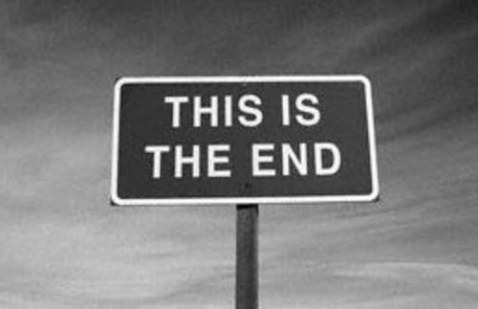

 ---

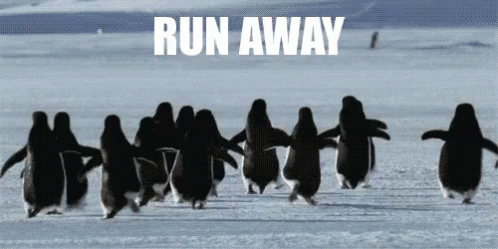

 ---